In [59]:
from PIL import Image
 # Open an image file
image_path = "main.jpg"
original_image = Image.open(image_path)
# Display the shape of the original image
original_shape = original_image.size
print("Original Image Shape:", original_shape)
# Define the new size
new_size = (4, 4) # Replace width and height with your desired values
# Resize the image
resized_image = original_image.resize(new_size)
# Display the shape of the resized image
resized_shape = resized_image.size
print("Resized Image Shape:", resized_shape)
# Save the resized image (optional)

resized_image.save("img2.jpeg")

# Display the resized image (optional)
resized_image.show()

Original Image Shape: (1280, 814)
Resized Image Shape: (4, 4)


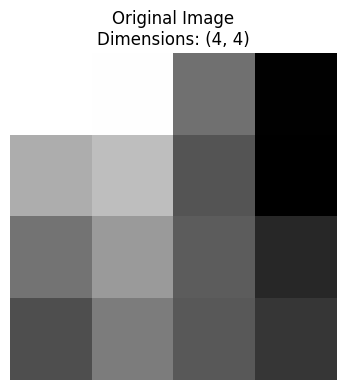

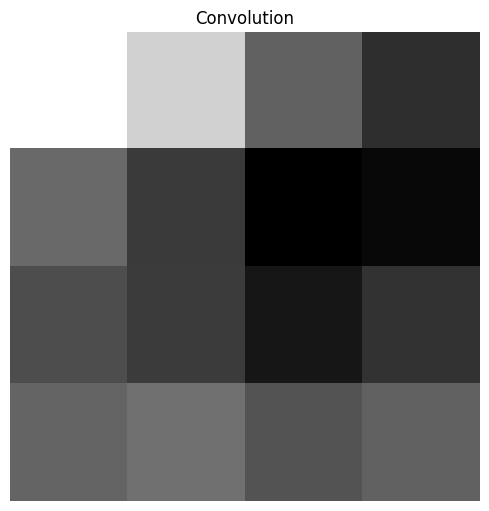

Original Image Matrix Values:
[[212. 211. 120.  49.]
 [159. 170. 102.  48.]
 [122. 147. 107.  73.]
 [ 98. 128. 105.  83.]]

After Convolution Matrix Values:
[[1156.  925.  380.  122.]
 [ 410.  180. -109.  -67.]
 [ 274.  185.    0.  139.]
 [ 387.  445.  302.  379.]]


In [60]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Set the params for plotting
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
# Define the kernel

kernel = tf.constant([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]], dtype=tf.float32)

# Add a channel dimension to the kernel
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)
# Load the image
image_path = "img2.jpeg"
original_image = Image.open(image_path).convert('L') # Convert to grayscale
# Convert the image to a NumPy array and cast to float32
img_array = np.array(original_image, dtype=np.float32)

# Display the original grayscale image, its dimensions, and matrix values
plt.figure(figsize=(4, 4))
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title(f"Original Image\nDimensions: {img_array.shape}")
plt.show()
# Add a batch and channel dimension to the image
image = tf.expand_dims(tf.expand_dims(img_array, axis=0), axis=-1)
# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
input=image,
filters=kernel,
strides=1,
padding='SAME',
)

# Plot the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.axis('off')
plt.title('Convolution')
plt.show()
# Print the matrix values before and after convolution
print("Original Image Matrix Values:")
print(img_array)
print("\nAfter Convolution Matrix Values:")
print(tf.squeeze(image_filter).numpy())




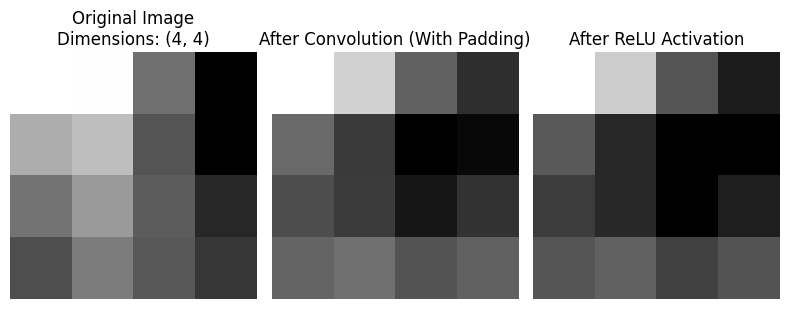

Original Image Matrix Values:
[[212. 211. 120.  49.]
 [159. 170. 102.  48.]
 [122. 147. 107.  73.]
 [ 98. 128. 105.  83.]]

After Convolution Matrix Values (No Padding):
[[1156.  925.  380.  122.]
 [ 410.  180. -109.  -67.]
 [ 274.  185.    0.  139.]
 [ 387.  445.  302.  379.]]

After ReLU Activation Matrix Values:
[[1156.  925.  380.  122.]
 [ 410.  180.    0.    0.]
 [ 274.  185.    0.  139.]
 [ 387.  445.  302.  379.]]


In [61]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Set the params for plotting
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
# Define the kernel
kernel = tf.constant([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]], dtype=tf.float32)
# Add a channel dimension to the kernel
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)
# Load the image
image_path = "img2.jpeg"
original_image = Image.open(image_path).convert('L') # Convert to grayscale
# Convert the image to a NumPy array and cast to float32
img_array = np.array(original_image, dtype=np.float32)
# Display the original grayscale image, its dimensions, and matrix values
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title(f"Original Image\nDimensions: {img_array.shape}")
# Add a batch and channel dimension to the image
image = tf.expand_dims(tf.expand_dims(img_array, axis=0), axis=-1)

# Convolution layer without padding
conv_fn = tf.nn.conv2d
convolved_image = conv_fn(
input=image,
filters=kernel,
strides=1,
padding='SAME',
)
# ReLU activation
relu_image = tf.nn.relu(convolved_image)
# Plot the convolved image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(convolved_image), cmap='gray')
plt.axis('off')
plt.title('After Convolution (With Padding)')
# Plot the image after ReLU activation
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(relu_image), cmap='gray')
plt.axis('off')
plt.title('After ReLU Activation')
plt.show()
# Print the matrix values before and after convolution
print("Original Image Matrix Values:")
print(img_array)
print("\nAfter Convolution Matrix Values (No Padding):")
print(tf.squeeze(convolved_image).numpy())
print("\nAfter ReLU Activation Matrix Values:")
print(tf.squeeze(relu_image).numpy())




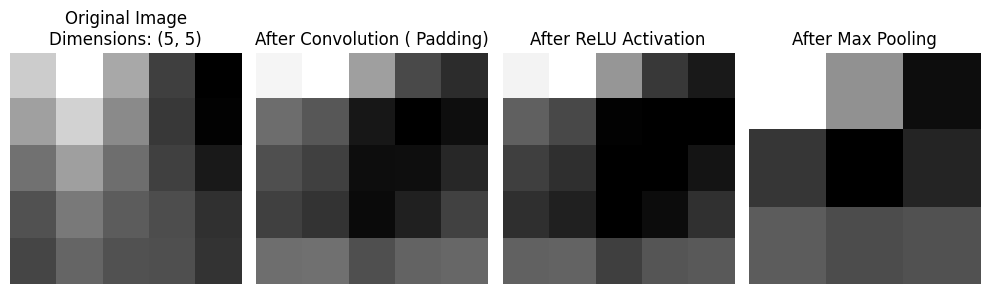

Original Image Matrix Values:
[[201. 242. 173.  90.  40.]
 [167. 206. 149.  85.  42.]
 [130. 166. 127.  91.  60.]
 [105. 137. 113. 101.  79.]
 [ 95. 120. 104. 103.  81.]]

After Convolution Matrix Values (With Padding):
[[ 993. 1040.  612.  231.  103.]
 [ 391.  293.   12.  -92.  -30.]
 [ 259.  194.  -32.  -28.   82.]
 [ 192.  136.  -45.   50.  196.]
 [ 398.  406.  258.  346.  365.]]

After ReLU Activation Matrix Values:
[[ 993. 1040.  612.  231.  103.]
 [ 391.  293.   12.    0.    0.]
 [ 259.  194.    0.    0.   82.]
 [ 192.  136.    0.   50.  196.]
 [ 398.  406.  258.  346.  365.]]

After Max Pooling Matrix Values:
[[1040.  612.  103.]
 [ 259.   50.  196.]
 [ 406.  346.  365.]]


In [54]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Set the params for plotting
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
# Define the kernel
kernel = tf.constant([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]], dtype=tf.float32)
# Add a channel dimension to the kernel
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)
# Load the image
image_path = "img2.jpeg"
original_image = Image.open(image_path).convert('L') # Convert to grayscale
# Convert the image to a NumPy array and cast to float32
img_array = np.array(original_image, dtype=np.float32)
# Display the original grayscale image, its dimensions, and matrix values
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title(f"Original Image\nDimensions: {img_array.shape}")
# Add a batch and channel dimension to the image
image = tf.expand_dims(tf.expand_dims(img_array, axis=0), axis=-1)

# Convolution layer with padding
conv_fn = tf.nn.conv2d
convolved_image = conv_fn(
input=image,
filters=kernel,
strides=1,
padding='SAME',
)
# ReLU activation
relu_image = tf.nn.relu(convolved_image)

# Max pooling
pooled_image = tf.nn.max_pool(
input=relu_image,
ksize=2,
strides=2,
padding='SAME',
)

# Plot the convolved image
plt.subplot(1, 4, 2)
plt.imshow(tf.squeeze(convolved_image), cmap='gray')
plt.axis('off')
plt.title('After Convolution ( Padding)')
# Plot the image after ReLU activation
plt.subplot(1, 4, 3)
plt.imshow(tf.squeeze(relu_image), cmap='gray')
plt.axis('off')
plt.title('After ReLU Activation')

# Plot the image after Max Pooling
plt.subplot(1, 4, 4)
plt.imshow(pooled_image[0, :, :, 0], cmap='gray') # Assuming batch size is 1
plt.axis('off')
plt.title('After Max Pooling')
plt.show()
# Print the matrix values before and after convolution
print("Original Image Matrix Values:")
print(img_array)
print("\nAfter Convolution Matrix Values (With Padding):")
print(tf.squeeze(convolved_image).numpy())
print("\nAfter ReLU Activation Matrix Values:")
print(tf.squeeze(relu_image).numpy())
print("\nAfter Max Pooling Matrix Values:")
print(tf.squeeze(pooled_image).numpy())

<ipython-input-66-6707afacafea>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 5)


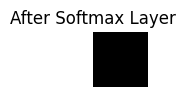


Max Pooling Matrix Values After Pooled Image 1:
[[1156.  380.]
 [ 445.  379.]]

Max Pooling Matrix Values After Pooled Image 2:
[[1156.]]

Fully Connected Layer Output Values:
[[579.  578.5]]

Softmax Output Values:
[[0.62245935 0.37754068]]


In [66]:


# Max pooling1
pooled_image1 = tf.nn.max_pool(
input=relu_image,
ksize=2,
strides=2,
padding='SAME',
)

#Max pooling2
pooled_image2 = tf.nn.max_pool(
input=pooled_image1,
ksize=2,
strides=2,
padding='SAME',
)


# Flatten the output of max pooling
flattened_output = tf.reshape(pooled_image2, (pooled_image2.shape[0], -1))

#Fully connected layer with specified weights and biases
fc_weights = tf.constant([[0.5], [0.5] ]) # Example weights
fc_biases = tf.constant([1.0, 0.5  ]) # Example biases
fc_layer = tf.keras.layers.Dense(units=2, activation=None, use_bias=True)
fc_layer.build((None, flattened_output.shape[1])) # Build the layer with correct input shape

fc_layer.set_weights([fc_weights.numpy().T, fc_biases.numpy()]) # Transpose weights

# Softmax activation
softmax_layer = tf.keras.layers.Softmax()
softmax_output = softmax_layer(fc_layer(flattened_output))

plt.title('After Max Pooling')
# Plot the image after Fully Connected layer
plt.subplot(1, 5, 5)
plt.imshow(softmax_output.numpy(), cmap='gray') # Display the output of the softmax layer
plt.axis('off')
plt.title('After Softmax Layer')
plt.show()

print("\nMax Pooling Matrix Values After Pooled Image 1:")
print(pooled_image1[0, :, :, 0].numpy())

print("\nMax Pooling Matrix Values After Pooled Image 2:")
print(pooled_image2[0, :, :, 0].numpy())

print("\nFully Connected Layer Output Values:")
print(fc_layer(flattened_output).numpy())

print("\nSoftmax Output Values:")
print(softmax_output.numpy())

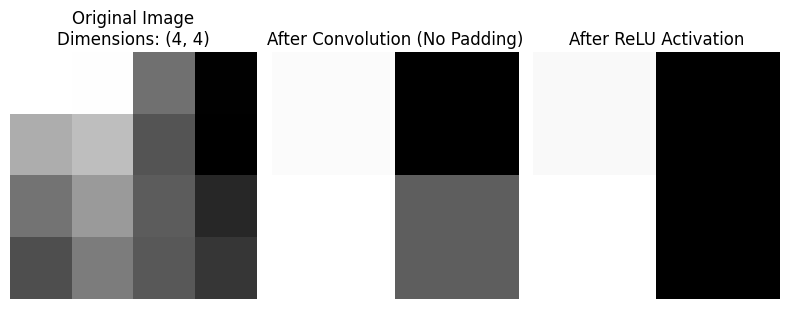

Original Image Matrix Values:
[[212. 211. 120.  49.]
 [159. 170. 102.  48.]
 [122. 147. 107.  73.]
 [ 98. 128. 105.  83.]]

After Convolution Matrix Values (No Padding):
[[ 180. -109.]
 [ 185.    0.]]

After ReLU Activation Matrix Values:
[[180.   0.]
 [185.   0.]]


In [48]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Set the params for plotting
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
# Define the kernel
kernel = tf.constant([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]], dtype=tf.float32)
# Add a channel dimension to the kernel
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)
# Load the image
image_path = "img2.jpeg"
original_image = Image.open(image_path).convert('L') # Convert to grayscale
# Convert the image to a NumPy array and cast to float32
img_array = np.array(original_image, dtype=np.float32)
# Display the original grayscale image, its dimensions, and matrix values
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title(f"Original Image\nDimensions: {img_array.shape}")
# Add a batch and channel dimension to the image
image = tf.expand_dims(tf.expand_dims(img_array, axis=0), axis=-1)

# Convolution layer without padding
conv_fn = tf.nn.conv2d
convolved_image = conv_fn(
input=image,
filters=kernel,
strides=1,
padding='VALID',
)
# ReLU activation
relu_image = tf.nn.relu(convolved_image)
# Plot the convolved image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(convolved_image), cmap='gray')
plt.axis('off')
plt.title('After Convolution (No Padding)')
# Plot the image after ReLU activation
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(relu_image), cmap='gray')
plt.axis('off')
plt.title('After ReLU Activation')
plt.show()
# Print the matrix values before and after convolution
print("Original Image Matrix Values:")
print(img_array)
print("\nAfter Convolution Matrix Values (No Padding):")
print(tf.squeeze(convolved_image).numpy())
print("\nAfter ReLU Activation Matrix Values:")
print(tf.squeeze(relu_image).numpy())




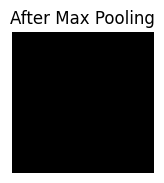


After Max Pooling Matrix Values:
185.0


In [49]:
# Max pooling
pooled_image = tf.nn.max_pool(
input=relu_image,
ksize=2,
strides=2,
padding='VALID',
)
plt.subplot(1, 4, 4)
plt.imshow(pooled_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('After Max Pooling')
plt.show()

print("\nAfter Max Pooling Matrix Values:")
print(tf.squeeze(pooled_image).numpy())

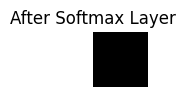


Fully Connected Layer Output Values:
[[93.5 93. ]]

Softmax Output Values:
[[0.62245935 0.37754068]]


In [50]:

# Flatten the output of max pooling
flattened_output = tf.reshape(pooled_image, (pooled_image.shape[0], -1))
# Fully connected layer with specified weights and biases
fc_weights = tf.constant([[0.5], [0.5]]) # Example weights
fc_biases = tf.constant([1.0, 0.5]) # Example biases
fc_layer = tf.keras.layers.Dense(units=2, activation=None, use_bias=True)
fc_layer.build((None, flattened_output.shape[1])) # Build the layer with correct input shape
fc_layer.set_weights([fc_weights.numpy().T, fc_biases.numpy()]) # Transpose weights
# Softmax activation
softmax_layer = tf.keras.layers.Softmax()
softmax_output = softmax_layer(fc_layer(flattened_output))

# Plot the image after Fully Connected layer
plt.subplot(1, 5, 5)
plt.imshow(softmax_output.numpy(), cmap='gray') # Display the output of the softmax layer
plt.axis('off')
plt.title('After Softmax Layer')
plt.show()

print("\nFully Connected Layer Output Values:")
print(fc_layer(flattened_output).numpy())
print("\nSoftmax Output Values:")
print(softmax_output.numpy())